In [1]:
!nproc & nvidia-smi -L

20
GPU 0: NVIDIA GeForce RTX 3060 (UUID: GPU-125eaf29-537f-5e5a-8a00-140ef5b42572)


In [4]:
!wget http://data.dws.informatik.uni-mannheim.de/largescaleproductcorpus/data/v2/offers_corpus_english_v2.json.gz
!wget http://data.dws.informatik.uni-mannheim.de/largescaleproductcorpus/data/v2_nonnorm/trainsets/shoes_train.zip
!unzip shoes_train.zip

--2021-12-14 22:32:10--  http://data.dws.informatik.uni-mannheim.de/largescaleproductcorpus/data/v2/offers_corpus_english_v2.json.gz
Resolving data.dws.informatik.uni-mannheim.de (data.dws.informatik.uni-mannheim.de)... 134.155.95.56, 134.155.96.51, 134.155.96.52, ...
Connecting to data.dws.informatik.uni-mannheim.de (data.dws.informatik.uni-mannheim.de)|134.155.95.56|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2928926313 (2.7G) [application/octet-stream]
Saving to: ‘offers_corpus_english_v2.json.gz.1’

_v2.json.gz.1        18%[==>                 ] 516.31M  3.39MB/s    eta 23m 34s^C
--2021-12-14 22:37:30--  http://data.dws.informatik.uni-mannheim.de/largescaleproductcorpus/data/v2_nonnorm/trainsets/shoes_train.zip
Resolving data.dws.informatik.uni-mannheim.de (data.dws.informatik.uni-mannheim.de)... 134.155.95.56, 134.155.96.51, 134.155.96.52, ...
Connecting to data.dws.informatik.uni-mannheim.de (data.dws.informatik.uni-mannheim.de)|134.155.95.56|:80... c

In [2]:
import gzip
import json
import pandas as pd
from tqdm.notebook import tqdm

train = pd.read_json("shoes_train/shoes_train_xlarge.json.gz", lines=True, compression='gzip')
train

,id_left,category_left,cluster_id_left,identifiers_left,id_right,category_right,cluster_id_right,identifiers_right,label,pair_id,...,description_left,description_right,keyValuePairs_left,keyValuePairs_right,price_left,price_right,specTableContent_left,specTableContent_right,title_left,title_right
0,9725423,Shoes,16023037,[{'/mpn': '[vpsggbx659]'}],5777153,Shoes,12588487,[{'/mpn': '[744951400]'}],0,9725423#5777153,...,"""\n With a ...","""\n Con una...",None,None,None,None,None,None,"""Concave Volt + SG - Silver/Blue""@en "" Concav...","""Nike Tiempo Legend V FG - Blu Laguna/Bianco/..."
1,7594816,Shoes,10565851,[{'/mpn': '[10335201]'}],8026601,Shoes,10053724,[{'/mpn': '[819186010]'}],0,7594816#8026601,...,"""\n Tige en...","""\n Progett...",None,None,None,None,None,None,"""Puma Classico SG Enfants- Noir-Blanc-Puma Go...","""Nike Tiempo Legend VI FG Junior - Nero/Bianc..."
2,2339190,Shoes,2564931,[{'/mpn': '[830369601]'}],6851546,Shoes,9395675,[{'/mpn': '[833258100]'}],0,2339190#6851546,...,None,"""\n L'empei...",None,None,None,None,None,None,"""Nike Flex 2016 Run - Rouge/ Noir/ Carmin/ Bl...","""Nike Free Train Versatility - Blanc/ Noir""@f..."
3,1628491,Shoes,147377,[{'/mpn': '[t639n4350]'}],8880408,Shoes,2076748,[{'/mpn': '[t5k3n4290]'}],0,1628491#8880408,...,None,None,None,None,None,None,None,None,"""Asics Fuze X - Azul/Naranja""@es "" Asics Zapa...","""Asics Gel-Zaraca 4 - Blu Methyl/Nero/Argento..."
4,3899621,Shoes,10504654,[{'/mpn': '[10330401]'}],6951403,Shoes,11713343,[{'/mpn': '[10362903]'}],0,3899621#6951403,...,"""\n Buty ev...","""\n The kid...",None,None,None,None,None,None,"""Buty Puma evoSPEED 1.3 Graphic FG - Biały-Zi...","""Puma Kids evoSPEED 5.5 FG - Puma Black/Puma ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42424,288217,Shoes,10540200,[{'/mpn': '[10333301]'}],13349725,Shoes,5557335,[{'/mpn': '[qpsgblkx66]'}],0,288217#13349725,...,"""\n Le scar...","""\n Zaproje...",None,None,None,None,None,None,"""Puma Esito Classico SG - Nero/Bianco/Bronzo""...","""Buty Concave Quantum + SG - Czarny/Biały""@pl..."
42425,16497150,Shoes,869300,[{'/mpn': '[10246301]'}],754930,Shoes,2210509,[{'/mpn': '[h1fgbgox717]'}],0,16497150#754930,...,"""\n De Puma...","""\n De Halo...",None,None,None,None,None,None,"""Puma King Top K Di FG - Zwart/Wit/Goud""@nl ""...","""Concave Halo 1.0 FG - Zwart/Goud""@nl "" Conca..."
42426,9970988,Shoes,5452760,[{'/mpn': '[749896009]'}],15583914,Shoes,1949524,[{'/mpn': '[747213003]'}],0,9970988#15583914,...,"""\n Estas N...","""\n Introdu...",None,None,None,None,None,None,"""Nike Hypervenom Phelon II FG -Negro/Volt""@es...","""Nike Hypervenom Phantom II FG - Pure Platinu..."
42427,5685875,Shoes,15554999,[{'/productID': '[s705n9099]'}],17446683,Shoes,13626366,[{'/productID': '[t700n9099]'}],0,5685875#17446683,...,None,None,None,None,None,None,None,None,"""SCARPA DA ALLENAMENTO GEL-CRAZE TR 4 UOMO""@i...","""GEL-NIMBUS 19 VOOR HEREN""@nl-nl HEREN | Men ..."


In [3]:
shoes_clusters = set()
shoes_clusters.update(set(train[train.category_left == "Shoes"]['cluster_id_left']))
shoes_clusters.update(set(train[train.category_right == "Shoes"]['cluster_id_right']))
print(len(shoes_clusters))

549


In [8]:
filtered_offers = []
def reader():
    with gzip.open("offers_corpus_english_v2.json.gz", 'rb') as f:
        for i, line in enumerate(f):
            line = json.loads(line.decode().strip())
            yield line

for line in iter(reader()):
    if line["cluster_id"] in shoes_clusters:
        filtered_offers.append(line)
print(len(filtered_offers))

3847


In [9]:
df = pd.DataFrame(filtered_offers)
df

,brand,category,cluster_id,description,id,identifiers,keyValuePairs,price,specTableContent,title
0,None,Shoes,10332766,created by nike for control and acceleration t...,16248,[{'/mpn': '[651632760]'}],None,None,None,nike mercurial victory v fg volt hyper pink bl...
1,None,Shoes,13809011,start the finishstart every attack on the pitc...,16766,[{'/mpn': '[819680004]'}],None,None,None,nike tiempo legend vi sg pro black hyper turqo...
2,None,Shoes,15993791,None,26205,[{'/mpn': '[747355001]'}],None,None,None,nike lunarglide 7 noir blanc anthracite chauss...
3,None,Shoes,13696117,None,32846,[{'/productID': '[t6e6n2001]'}],None,None,None,gel pulse 8 women hardloopschoenen voor dames ...
4,None,Shoes,13367168,the nike air presto was one of the first in a ...,34674,[{'/mpn': '[848132401]'}],None,None,None,nike sportswear air presto racer blue mens sho...
...,...,...,...,...,...,...,...,...,...,...
3842,None,Shoes,611164,None,17557357,[{'/productID': '[t727n9099]'}],None,None,None,"""GEL-SONOMA 3 G-TX FÜR HERREN""@de-at HERREN | ..."
3843,None,Shoes,5065280,None,17557389,[{'/sku': '[366731100]'}],None,None,None,"""Nike WMNS Air Force 1 Mid (366731-100)""@en"
3844,"""Nike""@pl",Shoes,14154440,""" ...",17557400,[{'/mpn': '[537384090]'}],None,None,None,"""NIKE AIR MAX 90 ESSENTIAL ""@pl"
3845,None,Shoes,9621324,None,17557449,[{'/sku': '[511881010]'}],None,None,None,"""Nike Roshe One (511881-010)""@en"


In [ ]:
df = df.dropna(subset=['title']).reset_index(drop=True)
df

In [13]:
import random
rand_cluster = random.choice(df.cluster_id.unique())
df[df.cluster_id == rand_cluster]

,brand,category,cluster_id,description,id,identifiers,keyValuePairs,price,specTableContent,title
373,baseball monkey,Shoes,5884797,nike air zoom pegasus 33 women s running shoe ...,1791729,[{'/sku': '[nikeftw831356001]'}],None,93 98 usd,None,nike air zoom pegasus 33 women s training shoe...
1883,goaliemonkey,Shoes,5884797,nike air zoom pegasus 33 women s running shoe ...,8803377,[{'/sku': '[nikeftw831356001]'}],None,93 98 usd,None,nike air zoom pegasus 33 women s training shoe...
2700,hockeymonkey com,Shoes,5884797,nike air zoom pegasus 33 women s running shoe ...,12452259,[{'/sku': '[nikeftw831356001]'}],None,93 98 usd,None,nike air zoom pegasus 33 women s training shoe...
3276,baseball monkey,Shoes,5884797,nike air zoom pegasus 33 women s running shoe ...,15166372,[{'/sku': '[nikeftw831356001]'}],None,93 98 usd,None,nike air zoom pegasus 33 women s training shoe...
3539,baseball monkey,Shoes,5884797,nike air zoom pegasus 33 women s running shoe ...,16270504,[{'/sku': '[nikeftw831356001]'}],None,93 98 usd,None,nike air zoom pegasus 33 women s training shoe...


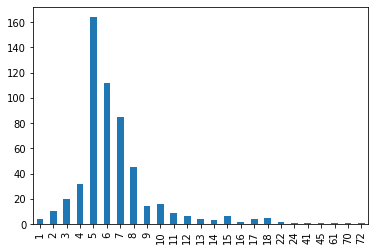

In [14]:
df.cluster_id.value_counts().value_counts().sort_index().plot.bar()

In [17]:
filter = df.cluster_id.value_counts()
df = df[df.cluster_id.isin(set(filter[filter > 2].index))].reset_index(drop=True)
df

,brand,category,cluster_id,description,id,identifiers,keyValuePairs,price,specTableContent,title,label
0,None,Shoes,10332766,created by nike for control and acceleration t...,16248,[{'/mpn': '[651632760]'}],None,None,None,nike mercurial victory v fg volt hyper pink bl...,304
1,None,Shoes,13809011,start the finishstart every attack on the pitc...,16766,[{'/mpn': '[819680004]'}],None,None,None,nike tiempo legend vi sg pro black hyper turqo...,443
2,None,Shoes,15993791,None,26205,[{'/mpn': '[747355001]'}],None,None,None,nike lunarglide 7 noir blanc anthracite chauss...,523
3,None,Shoes,13696117,None,32846,[{'/productID': '[t6e6n2001]'}],None,None,None,gel pulse 8 women hardloopschoenen voor dames ...,438
4,None,Shoes,13367168,the nike air presto was one of the first in a ...,34674,[{'/mpn': '[848132401]'}],None,None,None,nike sportswear air presto racer blue mens sho...,428
...,...,...,...,...,...,...,...,...,...,...,...
3818,None,Shoes,611164,None,17557357,[{'/productID': '[t727n9099]'}],None,None,None,"""GEL-SONOMA 3 G-TX FÜR HERREN""@de-at HERREN | ...",9
3819,None,Shoes,5065280,None,17557389,[{'/sku': '[366731100]'}],None,None,None,"""Nike WMNS Air Force 1 Mid (366731-100)""@en",133
3820,"""Nike""@pl",Shoes,14154440,""" ...",17557400,[{'/mpn': '[537384090]'}],None,None,None,"""NIKE AIR MAX 90 ESSENTIAL ""@pl",461
3821,None,Shoes,9621324,None,17557449,[{'/sku': '[511881010]'}],None,None,None,"""Nike Roshe One (511881-010)""@en",263


In [18]:
from sklearn.preprocessing import LabelEncoder
df['label'] = LabelEncoder().fit_transform(list(df.cluster_id))
df

,brand,category,cluster_id,description,id,identifiers,keyValuePairs,price,specTableContent,title,label
0,None,Shoes,10332766,created by nike for control and acceleration t...,16248,[{'/mpn': '[651632760]'}],None,None,None,nike mercurial victory v fg volt hyper pink bl...,304
1,None,Shoes,13809011,start the finishstart every attack on the pitc...,16766,[{'/mpn': '[819680004]'}],None,None,None,nike tiempo legend vi sg pro black hyper turqo...,443
2,None,Shoes,15993791,None,26205,[{'/mpn': '[747355001]'}],None,None,None,nike lunarglide 7 noir blanc anthracite chauss...,523
3,None,Shoes,13696117,None,32846,[{'/productID': '[t6e6n2001]'}],None,None,None,gel pulse 8 women hardloopschoenen voor dames ...,438
4,None,Shoes,13367168,the nike air presto was one of the first in a ...,34674,[{'/mpn': '[848132401]'}],None,None,None,nike sportswear air presto racer blue mens sho...,428
...,...,...,...,...,...,...,...,...,...,...,...
3818,None,Shoes,611164,None,17557357,[{'/productID': '[t727n9099]'}],None,None,None,"""GEL-SONOMA 3 G-TX FÜR HERREN""@de-at HERREN | ...",9
3819,None,Shoes,5065280,None,17557389,[{'/sku': '[366731100]'}],None,None,None,"""Nike WMNS Air Force 1 Mid (366731-100)""@en",133
3820,"""Nike""@pl",Shoes,14154440,""" ...",17557400,[{'/mpn': '[537384090]'}],None,None,None,"""NIKE AIR MAX 90 ESSENTIAL ""@pl",461
3821,None,Shoes,9621324,None,17557449,[{'/sku': '[511881010]'}],None,None,None,"""Nike Roshe One (511881-010)""@en",263


In [21]:
df.to_csv("s3://aisle3-ml-datasets/arcface/wdc.csv", index=False)